In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn, index_col="index")
data.head()

,crypto,time,open,high,low,close,volume,trade
index,,,,,,,,
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)
ethereum_df.head()

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [5]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [6]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [7]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df.head()

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [8]:
ethereum_df.dtypes

open      object
high      object
low       object
close     object
volume    object
trade     object
dtype: object

In [9]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float})
ethereum_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
trade     float64
dtype: object

In [10]:
# set the close price 14 day prior as another feature
projection = 14
ethereum_df["close(t-14)"] = ethereum_df["close"].shift(projection).astype(float)
ethereum_df.tail(15)

,open,high,low,close,volume,trade,close(t-14)
time,,,,,,,
2021-11-15,4626.50,4772.01,4540.00,4563.78,375421.6601,193844.8631,4319.43
2021-11-16,4563.77,4563.77,4103.00,4209.76,735857.0630,354749.4963,4589.89
2021-11-17,4209.59,4299.91,4063.48,4287.80,472852.1842,230168.3863,4603.35
2021-11-18,4288.07,4344.81,3956.44,3996.90,576945.1837,271503.5573,4532.32
2021-11-19,3996.90,4308.97,3973.01,4294.76,420045.0897,220791.4006,4474.24
2021-11-20,4294.75,4435.88,4199.86,4412.17,365584.5780,184875.7626,4518.00
2021-11-21,4412.17,4451.00,4242.41,4258.31,340206.3203,163875.6246,4612.59
2021-11-22,4259.70,4320.00,4022.74,4085.97,518501.3338,252693.2206,4807.98
2021-11-23,4086.28,4385.59,4059.62,4339.44,502811.7902,257182.2577,4732.33


In [11]:
# insert column with the difference between close(t-14)
ethereum_df["close(t-14) diff"] = ethereum_df["close(t-14)"].diff()
ethereum_df.head(30)

,open,high,low,close,volume,trade,close(t-14),close(t-14) diff
time,,,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377,NaN,NaN
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012,NaN,NaN
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922,NaN,NaN
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141,NaN,NaN
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293,NaN,NaN
2017-12-04,460.30,470.98,445.00,466.67,23182.65949,11708.14715,NaN,NaN
2017-12-05,466.66,468.67,445.21,452.26,25387.11695,12902.22244,NaN,NaN
2017-12-06,452.26,455.10,400.00,411.01,38638.76036,16000.21644,NaN,NaN
2017-12-07,413.50,427.61,375.01,406.33,41343.73269,17174.99356,NaN,NaN


In [12]:
ethereum_df.isnull().sum()

open                 0
high                 0
low                  0
close                0
volume               0
trade                0
close(t-14)         14
close(t-14) diff    15
dtype: int64

In [13]:
#remove nan rows
ethereum_df= ethereum_df.dropna()
ethereum_df.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
trade               0
close(t-14)         0
close(t-14) diff    0
dtype: int64

In [14]:
ethereum_df.info

<bound method DataFrame.info of                open     high      low    close        volume         trade  \
time                                                                         
2017-12-14   683.98   747.60   630.50   679.76   60919.26902   30685.47276   
2017-12-15   679.76   689.00   594.60   674.95   39778.16165   17125.09695   
2017-12-16   673.75   712.00   669.22   682.81   26866.05330   12518.18939   
2017-12-17   681.80   728.00   680.33   707.64   31398.44760   16831.51917   
2017-12-18   707.62   798.88   638.00   784.00   45673.70777   25894.22216   
...             ...      ...      ...      ...           ...           ...   
2021-11-25  4270.10  4550.00  4248.27  4524.85  445868.24340  231824.31930   
2021-11-26  4524.48  4551.00  3913.00  4041.20  720245.16120  348872.86610   
2021-11-27  4041.20  4183.66  4028.34  4095.29  275326.52020  136157.34820   
2021-11-28  4095.29  4298.51  3964.00  4294.78  346471.35510  174386.81870   
2021-11-29  4294.77  4458.92  42

In [15]:
# We want to reserve 30 days separate from test and train as unseen/holdout set
X = ethereum_df[:-30]
# Set our X features data by dropping our target
X = X.drop("close", axis=1)
X

,open,high,low,volume,trade,close(t-14),close(t-14) diff
time,,,,,,,
2017-12-14,683.98,747.60,630.50,60919.26902,30685.47276,427.43,5.73
2017-12-15,679.76,689.00,594.60,39778.16165,17125.09695,457.51,30.08
2017-12-16,673.75,712.00,669.22,26866.05330,12518.18939,457.63,0.12
2017-12-17,681.80,728.00,680.33,31398.44760,16831.51917,460.30,2.67
2017-12-18,707.62,798.88,638.00,45673.70777,25894.22216,466.67,6.37
...,...,...,...,...,...,...,...
2021-10-26,4220.36,4297.00,4090.21,414498.15990,205853.06890,3491.46,-50.66
2021-10-27,4131.52,4307.00,3909.00,704604.25000,342946.25220,3607.42,115.96
2021-10-28,3921.99,4295.00,3890.17,626378.50550,331721.67970,3790.82,183.40


In [16]:
# Reserve 30 days as unseen data for future testing
y = ethereum_df[:-30]

# Set y target
y = y["close"]
y

time
2017-12-14     679.76
2017-12-15     674.95
2017-12-16     682.81
2017-12-17     707.64
2017-12-18     784.00
               ...   
2021-10-26    4131.52
2021-10-27    3922.00
2021-10-28    4286.02
2021-10-29    4418.89
2021-10-30    4322.68
Name: close, Length: 1417, dtype: float64

LR: 0.996195 (0.000709)
Lasso: 0.904743 (0.059773)
Ridge: 0.445327 (0.426961)
RF: 0.412688 (0.811330)
XGBOOST: 0.422452 (0.779692)
NN: 0.976386 (0.025491)
KNN: -7.279896 (7.081138)
SVR: -11.584252 (13.787667)


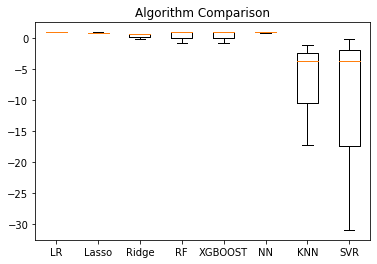

In [17]:
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [18]:
# We need to set our training and testing data.
# We want all of the data except the last 30 days to train on, and we will test on the last 30 days
# We have to mak sure not to include our unseen/hold out data

X_train = ethereum_df[:-60].drop("close",axis=1)
print(X_train)


y_train = ethereum_df[:-60]
y_train = y_train["close"]
y_train

               open     high      low        volume         trade  \
time                                                                
2017-12-14   683.98   747.60   630.50   60919.26902   30685.47276   
2017-12-15   679.76   689.00   594.60   39778.16165   17125.09695   
2017-12-16   673.75   712.00   669.22   26866.05330   12518.18939   
2017-12-17   681.80   728.00   680.33   31398.44760   16831.51917   
2017-12-18   707.62   798.88   638.00   45673.70777   25894.22216   
...             ...      ...      ...           ...           ...   
2021-09-26  2921.84  3115.51  2738.17  703594.47800  346152.90530   
2021-09-27  3059.36  3164.94  2922.71  510130.73190  249913.29030   
2021-09-28  2924.76  2970.82  2789.00  511325.46430  250476.15270   
2021-09-29  2805.15  2950.00  2782.00  411305.08930  207837.60360   
2021-09-30  2850.45  3048.42  2837.19  506896.76120  255146.89260   

            close(t-14)  close(t-14) diff  
time                                       
2017-12-14    

time
2017-12-14     679.76
2017-12-15     674.95
2017-12-16     682.81
2017-12-17     707.64
2017-12-18     784.00
               ...   
2021-09-26    3059.37
2021-09-27    2925.59
2021-09-28    2804.91
2021-09-29    2850.45
2021-09-30    3000.61
Name: close, Length: 1387, dtype: float64

In [19]:
# Our testing set will be the last 30 days of the data not including our holdout/unseen data
# Just the last 30 days
X_test = ethereum_df[-60:].drop("close", axis=1)
X_test = X_test[:-30]
print(X_test)

y_test = ethereum_df[-60:]
y_test = y_test[:-30]
y_test = y_test["close"]
y_test

               open     high      low        volume         trade  \
time                                                                
2021-10-01  3000.62  3330.00  2969.07  648714.61510  336578.17690   
2021-10-02  3309.91  3469.00  3257.00  422551.18110  215469.09750   
2021-10-03  3387.77  3488.00  3342.51  360586.89050  183173.92820   
2021-10-04  3417.73  3437.19  3270.00  485204.64200  234726.45740   
2021-10-05  3386.31  3545.00  3363.78  393900.88180  198949.77870   
2021-10-06  3515.48  3632.11  3342.00  618265.54020  309931.14560   
2021-10-07  3574.88  3653.98  3470.80  486102.35910  243095.03090   
2021-10-08  3587.47  3695.00  3532.00  403597.14370  199496.51730   
2021-10-09  3563.13  3635.00  3538.07  361906.75140  181998.68950   
2021-10-10  3574.83  3604.00  3405.00  580223.63020  283364.09360   
2021-10-11  3414.22  3623.80  3371.00  493521.88200  241854.81720   
2021-10-12  3542.12  3547.11  3403.21  409377.19180  201641.41480   
2021-10-13  3491.43  3613.00  3412

time
2021-10-01    3309.91
2021-10-02    3387.76
2021-10-03    3417.73
2021-10-04    3386.31
2021-10-05    3515.27
2021-10-06    3574.89
2021-10-07    3587.47
2021-10-08    3563.13
2021-10-09    3574.82
2021-10-10    3414.22
2021-10-11    3542.12
2021-10-12    3491.46
2021-10-13    3607.42
2021-10-14    3790.82
2021-10-15    3868.99
2021-10-16    3829.96
2021-10-17    3846.85
2021-10-18    3744.96
2021-10-19    3877.03
2021-10-20    4161.15
2021-10-21    4052.99
2021-10-22    3972.20
2021-10-23    4167.12
2021-10-24    4082.33
2021-10-25    4220.37
2021-10-26    4131.52
2021-10-27    3922.00
2021-10-28    4286.02
2021-10-29    4418.89
2021-10-30    4322.68
Name: close, dtype: float64

In [20]:
model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print("R2 Score",model.score(X_test,y_test))

R2 Score 0.9523066891066028


In [21]:
predictions = model.predict(X_test)
data = pd.DataFrame()
data["actual"] = y_test
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-10-01,3309.91,3263.615798,-46.294202,-1.398654
2021-10-02,3387.76,3407.608861,19.848861,0.585899
2021-10-03,3417.73,3431.435443,13.705443,0.401010
2021-10-04,3386.31,3312.417566,-73.892434,-2.182093
2021-10-05,3515.27,3491.656369,-23.613631,-0.671744
2021-10-06,3574.89,3503.258561,-71.631439,-2.003738
2021-10-07,3587.47,3565.124252,-22.345748,-0.622883
2021-10-08,3563.13,3623.499047,60.369047,1.694270
2021-10-09,3574.82,3593.722952,18.902952,0.528781


In [22]:
print(data["difference (%)"].mean())

-0.015041759908868321


In [23]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

52.35433309224471

<AxesSubplot:xlabel='time'>

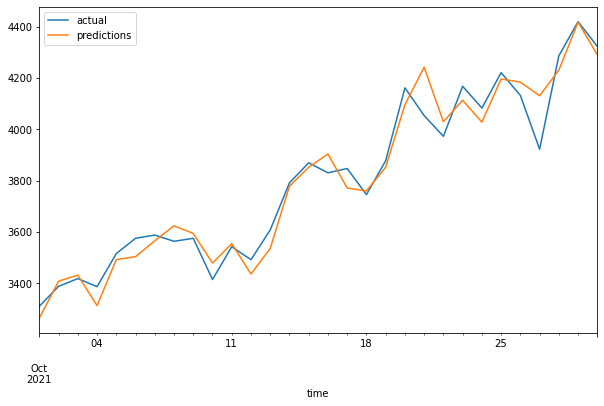

In [24]:
#plot chart
data.plot(y=["actual", "predictions"], figsize=(10,6))

In [25]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = X_train.columns.tolist()
data

,scores,features
0,-0.545724,open
1,0.902163,high
2,0.635322,low
3,-0.000096,volume
4,0.000196,trade
5,0.003904,close(t-14)
6,0.030632,close(t-14) diff


<AxesSubplot:xlabel='features'>

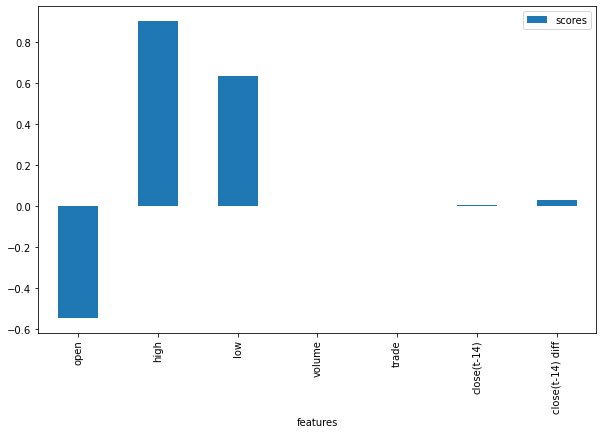

In [26]:
data.plot(kind="bar", x="features", y="scores", figsize=(10,6))

In [27]:
# now lets try it on the data we reserved
unseen_data = ethereum_df[-30:]
actual_values = unseen_data["close"]
unseen_data = unseen_data.drop("close", axis=1)
unseen_data

,open,high,low,volume,trade,close(t-14),close(t-14) diff
time,,,,,,,
2021-10-31,4322.68,4399.14,4164.35,412856.28930,207029.19300,3846.85,16.89
2021-11-01,4287.48,4386.58,4146.30,417620.70730,208433.93650,3744.96,-101.89
2021-11-02,4319.43,4599.60,4284.43,468184.79301,245450.71120,3877.03,132.07
2021-11-03,4589.68,4665.87,4455.00,448658.35125,221693.79026,4161.15,284.12
2021-11-04,4603.35,4606.65,4420.08,368218.25695,180789.48190,4052.99,-108.16
2021-11-05,4532.31,4570.05,4438.80,305651.72440,152155.85650,3972.20,-80.79
2021-11-06,4474.24,4530.00,4326.17,322154.09730,162175.62780,4167.12,194.92
2021-11-07,4518.00,4637.98,4502.37,243596.59520,124167.19250,4082.33,-84.79
2021-11-08,4612.59,4822.97,4612.00,391102.31806,202324.49531,4220.37,138.04


In [28]:
pred = model.predict(unseen_data)

In [29]:
data = pd.DataFrame()
data["actual"] = actual_values
data["predicted"] = pred
data

,actual,predicted
time,,
2021-10-31,4287.21,4270.819198
2021-11-01,4319.43,4263.009884
2021-11-02,4589.89,4535.572797
2021-11-03,4603.35,4559.237764
2021-11-04,4532.32,4463.463666
2021-11-05,4474.24,4482.047101
2021-11-06,4518.00,4415.628971
2021-11-07,4612.59,4592.330401
2021-11-08,4807.98,4785.717546


<AxesSubplot:xlabel='time'>

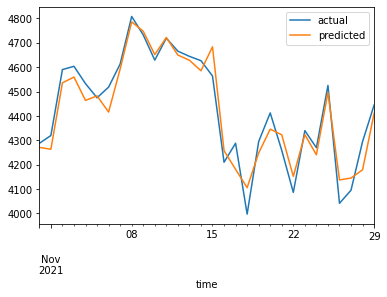

In [30]:
# plot the results
data.plot()

In [31]:
#r2 score on unseen
from sklearn.metrics import r2_score
pred_unseen = model.predict(unseen_data)
r2_score(actual_values, pred_unseen)

0.9212016172965276

In [32]:
# test for overfitting.
from sklearn.metrics import mean_absolute_error, r2_score
pred_train = model.predict(X_train)
r2_score(y_train, pred_train)

0.9991599968775549

In [33]:
pred_test = model.predict(X_test)
r2_score(y_test, pred_test)

0.9523066891066028

In [34]:
#import pickle
#pickle.dump(model, open("best_model.pkl", "wb"))

# import pickle
# loaded_model= pickle.load(open("best_model.pkl", "rb"))

# loaded_model.predict(X_test)